In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib.dates as dates
import pymannkendall as mk

## analysis of trend and state


ndvi 2000-2012 sorted
2002-12-31    0.407456
2008-12-31    0.431620
2000-12-31    0.442901
2005-12-31    0.458772
2010-12-31    0.468092
2012-12-31    0.490922
2001-12-31    0.502816
2007-12-31    0.517473
2011-12-31    0.520043
2009-12-31    0.522990
2003-12-31    0.532621
2004-12-31    0.541616
2006-12-31    0.571456
Name: ndvi, dtype: float64
2013-2015 mean ndvi, rank:  0.49069157380269074 38.46153846153846
2019-2021 mean ndvi, rank:  0.5484778134355769 92.3076923076923
difference rank:  53.84615384615385
trend 2000-2014: no trend
trend 2014 2021: no trend


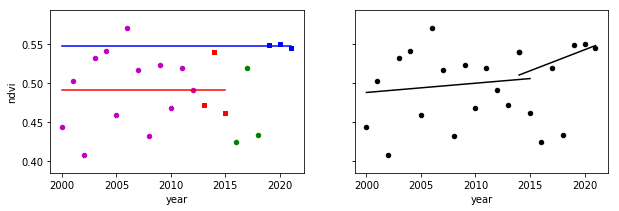

In [12]:
slope = 0.0 
rand_mu = 0.5
rand_sigma=0.05

df = pd.DataFrame()
df['year']= np.arange(2000, 2022)
df.index= pd.date_range(start='2000', end='2022', freq='1Y')
df['ndvi'] = slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 22)  

print('ndvi 2000-2012 sorted')
print(df.loc['2000':'2012', 'ndvi'].sort_values())

mean_13_15 = df.loc['2013':'2015', 'ndvi'].mean()
rank_13_15 = stats.percentileofscore(df.loc['2000':'2012', 'ndvi'], mean_13_15)
mean_19_21 = df.loc['2019':'2021', 'ndvi'].mean()
rank_19_21 = stats.percentileofscore(df.loc['2000':'2012', 'ndvi'], mean_19_21)
print('2013-2015 mean ndvi, rank: ', mean_13_15, rank_13_15)
print('2019-2021 mean ndvi, rank: ', mean_19_21, rank_19_21)
print('difference rank: ', rank_19_21 - rank_13_15)

trend_2000_2015, h, p, z, Tau, s, var_s, slope_2000_2015, intercept_2000_2015 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
trend_2014_2021, h, p, z, Tau, s, var_s, slope_2014_2021, intercept_2014_2021 = mk.original_test(df.loc['2014':'2021', 'ndvi'])
print('trend 2000-2014:', trend_2000_2015)
print('trend 2014 2021:', trend_2014_2021)


fig, ax = plt.subplots(1,2, figsize=[10,3], sharey=True)
df.loc['2000':'2012'].plot.scatter(x='year', y='ndvi', marker='o', color='m', linestyle='None', zorder=1, ax=ax[0])
df.loc['2016':'2018'].plot.scatter(x='year', y='ndvi', marker='o', color='g', linestyle='None', zorder=1, ax=ax[0])
df.loc['2013':'2015'].plot.scatter(x='year', y='ndvi', marker='s', color='r', linestyle='None', zorder=2, ax=ax[0])
df.loc['2019':'2021'].plot.scatter(x='year', y='ndvi', marker='s', color='b', linestyle='None', zorder=2, ax=ax[0])
#ax.set_xlim(['1999','2021'])
#ax.set_ylim([0,0.8])
ax[0].plot([2000,2015],[mean_13_15,mean_13_15], color= 'r')
ax[0].plot([2000,2021],[mean_19_21,mean_19_21], color= 'b')
#df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
#ax[0].legend().set_visible(False)

if trend_2000_2015 != 'no trend':
    ax[0].plot(df.loc['2000':'2015', 'year'], intercept_2000_2015 + (df.loc['2000':'2015', 'year'] - 2000) * slope_2000_2015, color='k') 
if trend_2014_2021 != 'no trend':
    ax[0].plot(df.loc['2014':'2021', 'year'], intercept_2014_2021 + (df.loc['2014':'2021', 'year'] - 2014) * slope_2014_2021, color='k') 
    

df.loc['2000':'2014'].plot.scatter(x='year', y='ndvi', marker='o', color='k', linestyle='None', zorder=1, ax=ax[1])
df.loc['2014':'2021'].plot.scatter(x='year', y='ndvi', marker='o', color='k', linestyle='None', zorder=1, ax=ax[1])
ax[1].plot(df.loc['2000':'2015', 'year'], intercept_2000_2015 + (df.loc['2000':'2015', 'year'] - 2000) * slope_2000_2015, color='k') 
ax[1].plot(df.loc['2014':'2021', 'year'], intercept_2014_2021 + (df.loc['2014':'2021', 'year'] - 2014) * slope_2014_2021, color='k') 
plt.show()


/apps/python/3.7.2/lib/python3.7/site-packages/matplotlib-3.0.2-py3.7-linux-x86_64.egg/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


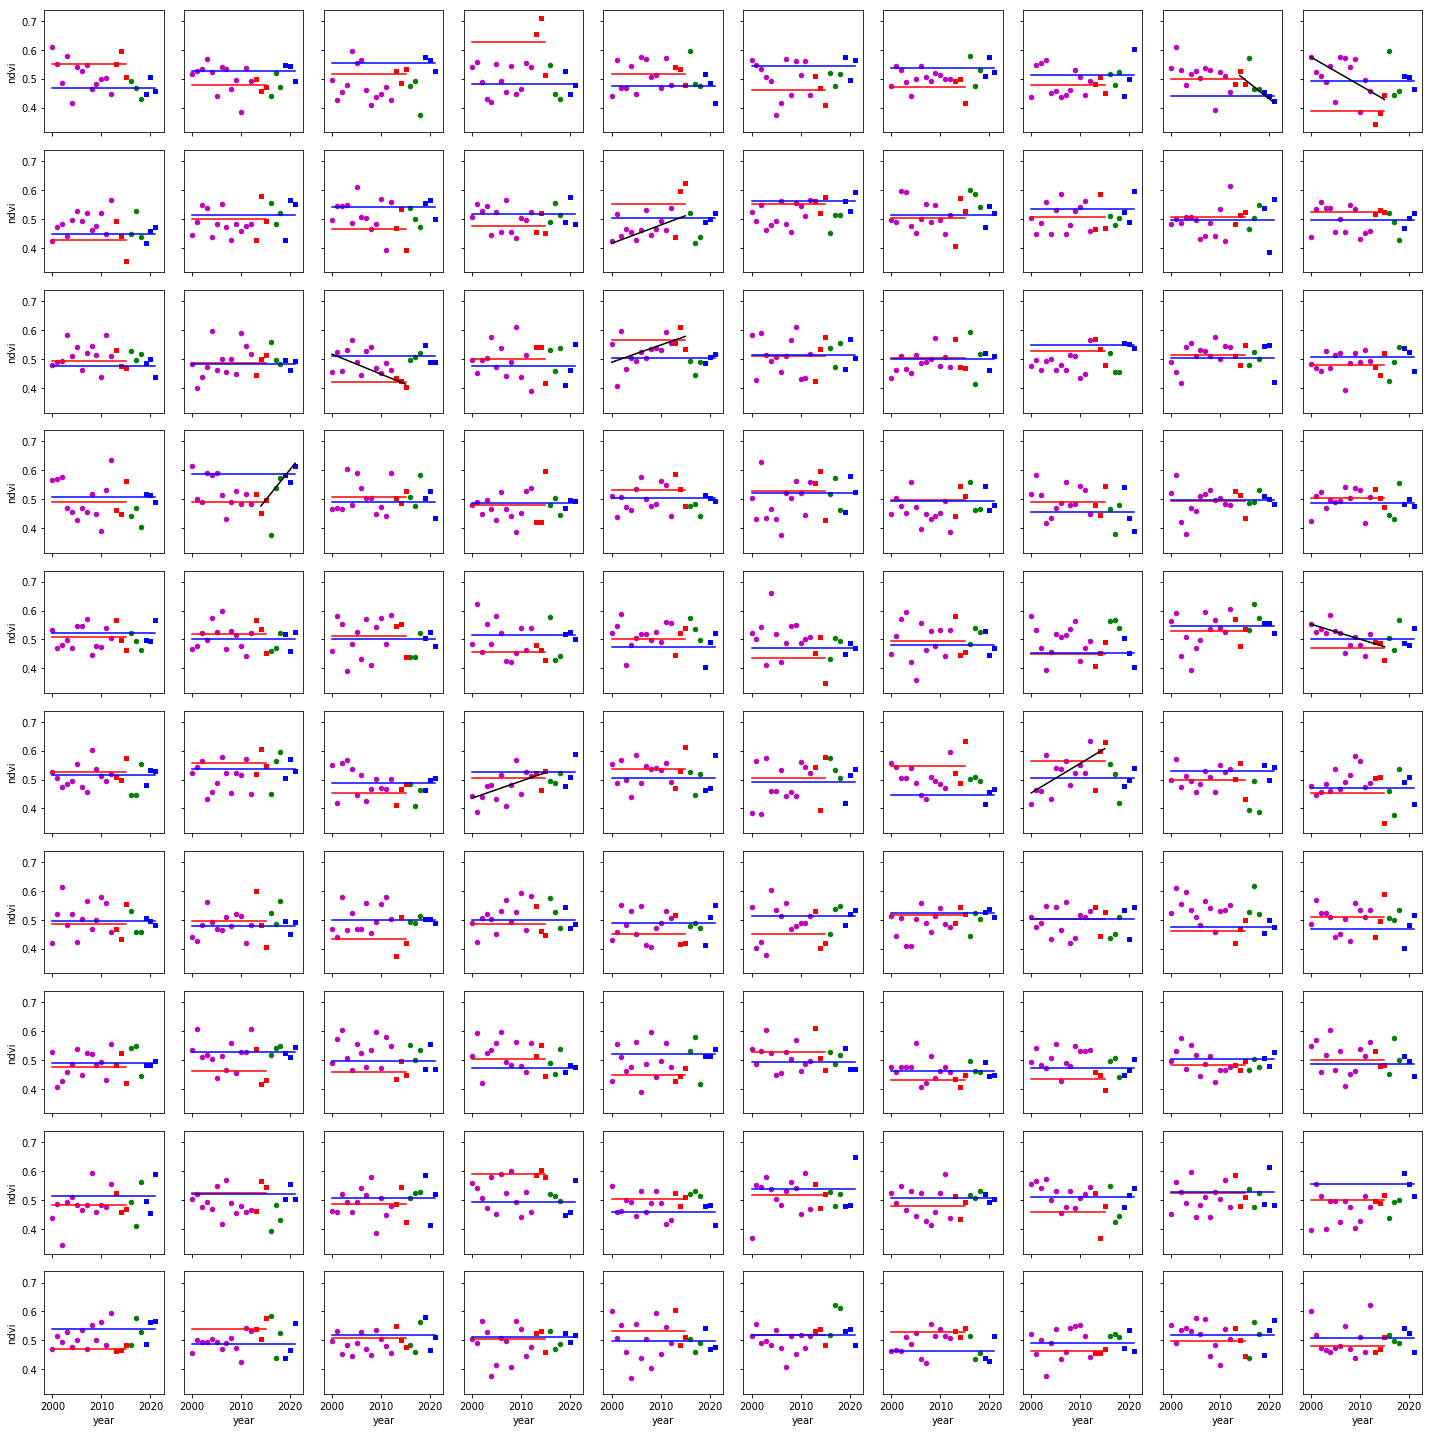

100 simulations run
44  simulations had positive or negative change (abs value more than 20)
7  simulations had positive or negative trend in 2000-2015
2  simulations had positive or negative trend in 2014-2021


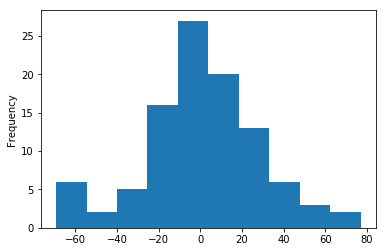

,slope,rand_mu,rand_sigma,mean_13_15,mean_19_21,rank_13_15,rank_19_21,rank_diff,trend_2000_2015,trend_2014_2021
0,0.0,0.5,0.05,0.5511414823358171,0.46921613679683943,84.61538461538461,23.076923076923077,-61.53846153846153,no trend,no trend
1,0.0,0.5,0.05,0.4766331397964582,0.5281521334296759,23.076923076923077,61.53846153846154,38.46153846153847,no trend,no trend
2,0.0,0.5,0.05,0.5161589434519318,0.555656357271128,76.92307692307692,84.61538461538461,7.692307692307693,no trend,no trend
3,0.0,0.5,0.05,0.6269542294830829,0.48258443757881625,100.0,38.46153846153846,-61.53846153846154,no trend,no trend
4,0.0,0.5,0.05,0.5175897614039463,0.4731384280691681,61.53846153846154,38.46153846153846,-23.07692307692308,no trend,no trend
5,0.0,0.5,0.05,0.46165284357388336,0.5453384662072055,30.76923076923077,61.53846153846154,30.76923076923077,no trend,no trend
6,0.0,0.5,0.05,0.46990191717595237,0.5365277888963544,7.6923076923076925,84.61538461538461,76.92307692307692,no trend,no trend
7,0.0,0.5,0.05,0.47884531299199673,0.5141826993217546,53.84615384615385,69.23076923076923,15.38461538461538,no trend,no trend
8,0.0,0.5,0.05,0.4978426094764263,0.4387361960202966,23.076923076923077,7.6923076923076925,-15.384615384615383,no trend,decreasing
9,0.0,0.5,0.05,0.3885715943326709,0.4926593474940608,7.6923076923076925,30.76923076923077,23.076923076923077,decreasing,no trend


In [5]:
results = pd.DataFrame()

slope = 0.0 
rand_mu = 0.5
rand_sigma=0.05

# set to 0 if no plots wanted (don't plot if more than 100 simulations)
plot = 1
simulations = 100

if plot:
    fig, ax = plt.subplots(10,10,sharex=True, sharey=True, figsize=(20 ,20), tight_layout=True)
    ax_x = 0
    ax_y = 0

for i in range(simulations):
    df = pd.DataFrame()
    df['year']= np.arange(2000, 2022)
    df.index= pd.date_range(start='2000', end='2022', freq='1Y')
    df['ndvi'] = slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 22)  

    mean_13_15 = df.loc['2013':'2015', 'ndvi'].mean()
    rank_13_15 = stats.percentileofscore(df.loc['2000':'2012', 'ndvi'], mean_13_15)
    mean_19_21 = df.loc['2019':'2021', 'ndvi'].mean()
    rank_19_21 = stats.percentileofscore(df.loc['2000':'2012', 'ndvi'], mean_19_21)
    rank_diff = rank_19_21 - rank_13_15

    trend_2000_2015, h, p, z, Tau, s, var_s, slope_2000_2015, intercept_2000_2015 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
    trend_2014_2021, h, p, z, Tau, s, var_s, slope_2014_2021, intercept_2014_2021 = mk.original_test(df.loc['2014':'2021', 'ndvi'])

    df_result = pd.DataFrame(np.array([[slope,rand_mu,rand_sigma,mean_13_15,mean_19_21,rank_13_15,rank_19_21,rank_diff,trend_2000_2015,trend_2014_2021]]), 
                      columns=['slope','rand_mu','rand_sigma','mean_13_15','mean_19_21','rank_13_15','rank_19_21','rank_diff','trend_2000_2015','trend_2014_2021'],
                      index=[i])
    
    results=results.append(df_result)
    
    if plot:
        df.loc['2000':'2012'].plot.scatter(x='year', y='ndvi', marker='o', color='m', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
        df.loc['2016':'2018'].plot.scatter(x='year', y='ndvi', marker='o', color='g', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
        df.loc['2013':'2015'].plot.scatter(x='year', y='ndvi', marker='s', color='r', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
        df.loc['2019':'2021'].plot.scatter(x='year', y='ndvi', marker='s', color='b', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
        #ax.set_xlim(['1999','2021'])
        #ax.set_ylim([0,0.8])
        ax[ax_x,ax_y].plot([2000,2015],[mean_13_15,mean_13_15], color= 'r')
        ax[ax_x,ax_y].plot([2000,2021],[mean_19_21,mean_19_21], color= 'b')
        #df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
        #ax[ax_x,ax_y].legend().set_visible(False)

        if trend_2000_2015 != 'no trend':
            ax[ax_x,ax_y].plot(df.loc['2000':'2015', 'year'], intercept_2000_2015 + (df.loc['2000':'2015', 'year'] - 2000) * slope_2000_2015, color='k') 
        if trend_2014_2021 != 'no trend':
            ax[ax_x,ax_y].plot(df.loc['2014':'2021', 'year'], intercept_2014_2021 + (df.loc['2014':'2021', 'year'] - 2014) * slope_2014_2021, color='k') 
                
        if ax_y == 9:
            ax_y=0
            ax_x=ax_x+1
        else:
            ax_y=ax_y+1        
    
if plot:
    plt.show()

print(simulations, 'simulations run')
print(results.loc[results['rank_diff'].astype(float).abs() > 20, 'rank_diff'].count(), ' simulations had positive or negative change (abs value more than 20)')
print(results.loc[results['trend_2000_2015'] != 'no trend', 'trend_2000_2015'].count(), ' simulations had positive or negative trend in 2000-2015')
print(results.loc[results['trend_2014_2021'] != 'no trend', 'trend_2014_2021'].count(), ' simulations had positive or negative trend in 2014-2021')
results['rank_diff'].astype(float).plot.hist()
plt.show()

results

## some ideas to improve the indicators: 
Trend shows the trajectory of productivity over a relatively long period of time. As it is now it's ok, the non-parametric slope test. The only thing I don't agree with is using 15 years for the baseline and 8 years for the period being assessed (if it's 2020 it would be 2012-2020). I would use the same length in all cases. I propose using a period of 15 years. 

For state: 
my proposal is to: 
take the year of assessment, let's say 2020. 
Use the last 15 years in the period: 2006-2020. Take the mean value of the last three (2018, 2019 and 2020) and compare that in a ranking to the initial 12 years in the period (2006-2017). 
If the mean of the last 3 years is at the bottom 10% of the comparison term (2006-2012) then it's potential state degradation. If it's at the top 10% then it's potential state improvement. 


### below an example for a pixel
slope is the change in ndvi per year
rand_mu is the mean ndvi for 2000
rand_sigma is the std dev of ndvi

2012-2014 mean ndvi, rank:  0.5428905525207197 83.33333333333333
2018-2020 mean ndvi, rank:  0.5145359702348556 58.333333333333336
trend 2000-2014 no trend
trend 2006 2020 no trend


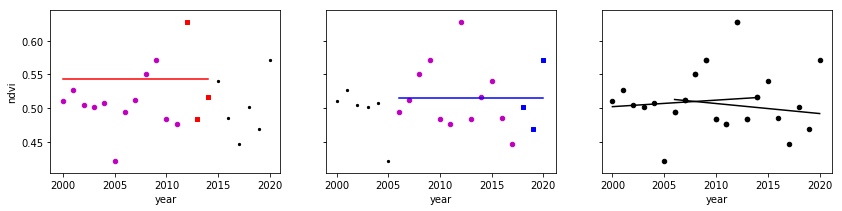

In [4]:
slope = 0.0 
rand_mu = 0.5
rand_sigma=0.05

df = pd.DataFrame()
df['year']= np.arange(2000, 2021)
df.index= pd.date_range(start='2000', end='2021', freq='1Y')
df['ndvi'] = slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  


#print('ndvi 2000-2014 sorted')
#print(df.loc['2000':'2014', 'ndvi'].sort_values())

mean_12_14 = df.loc['2012':'2014', 'ndvi'].mean()
rank_12_14 = stats.percentileofscore(df.loc['2000':'2011', 'ndvi'], mean_12_14)
mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
rank_18_20 = stats.percentileofscore(df.loc['2006':'2017', 'ndvi'], mean_18_20)
print('2012-2014 mean ndvi, rank: ', mean_12_14, rank_12_14)
print('2018-2020 mean ndvi, rank: ', mean_18_20, rank_18_20)
#print('difference rank: ', rank_18_20 - rank_12_14)

trend_2000_2014, h, p, z, Tau, s, var_s, slope_2000_2014, intercept_2000_2014 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
trend_2006_2020, h, p, z, Tau, s, var_s, slope_2006_2020, intercept_2006_2020 = mk.original_test(df.loc['2006':'2020', 'ndvi'])
print('trend 2000-2014', trend_2000_2014)
print('trend 2006 2020', trend_2006_2020)


fig, ax = plt.subplots(1,3, figsize=[14,3], sharey=True)
df.loc['2000':'2020'].plot.scatter(x='year', y='ndvi', marker='.', color='k', linestyle='None', zorder=1, ax=ax[0])
df.loc['2000':'2011'].plot.scatter(x='year', y='ndvi', marker='o', color='m', linestyle='None', zorder=2, ax=ax[0])
df.loc['2012':'2014'].plot.scatter(x='year', y='ndvi', marker='s', color='r', linestyle='None', zorder=3, ax=ax[0])

df.loc['2000':'2020'].plot.scatter(x='year', y='ndvi', marker='.', color='k', linestyle='None', zorder=1, ax=ax[1])
df.loc['2006':'2017'].plot.scatter(x='year', y='ndvi', marker='o', color='m', linestyle='None', zorder=2, ax=ax[1])
df.loc['2018':'2020'].plot.scatter(x='year', y='ndvi', marker='s', color='b', linestyle='None', zorder=3, ax=ax[1])
#ax.set_xlim(['1999','2021'])
#ax.set_ylim([0,0.8])
ax[0].plot([2000,2014],[mean_12_14,mean_12_14], color= 'r')
ax[1].plot([2006,2020],[mean_18_20,mean_18_20], color= 'b')
#df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
#ax[0].legend().set_visible(False)

if trend_2000_2014 != 'no trend':
    ax[0].plot(df.loc['2000':'2014', 'year'], intercept_2000_2014 + (df.loc['2000':'2014', 'year'] - 2000) * slope_2000_2014, color='k') 
if trend_2006_2020 != 'no trend':
    ax[1].plot(df.loc['2006':'2020', 'year'], intercept_2006_2020 + (df.loc['2006':'2020', 'year'] - 2006) * slope_2006_2020, color='k') 
    

df.loc['2000':'2014'].plot.scatter(x='year', y='ndvi', marker='o', color='k', linestyle='None', zorder=2, ax=ax[2])
df.loc['2006':'2020'].plot.scatter(x='year', y='ndvi', marker='o', color='k', linestyle='None', zorder=3, ax=ax[2])
ax[2].plot(df.loc['2000':'2014', 'year'], intercept_2000_2014 + (df.loc['2000':'2014', 'year'] - 2000) * slope_2000_2014, color='k') 
ax[2].plot(df.loc['2006':'2020', 'year'], intercept_2006_2020 + (df.loc['2006':'2020', 'year'] - 2006) * slope_2006_2020, color='k') 
plt.show()


now repeat the analysis 100 times (can be more, but avoid plotting) and show plots with the results and summaries. 

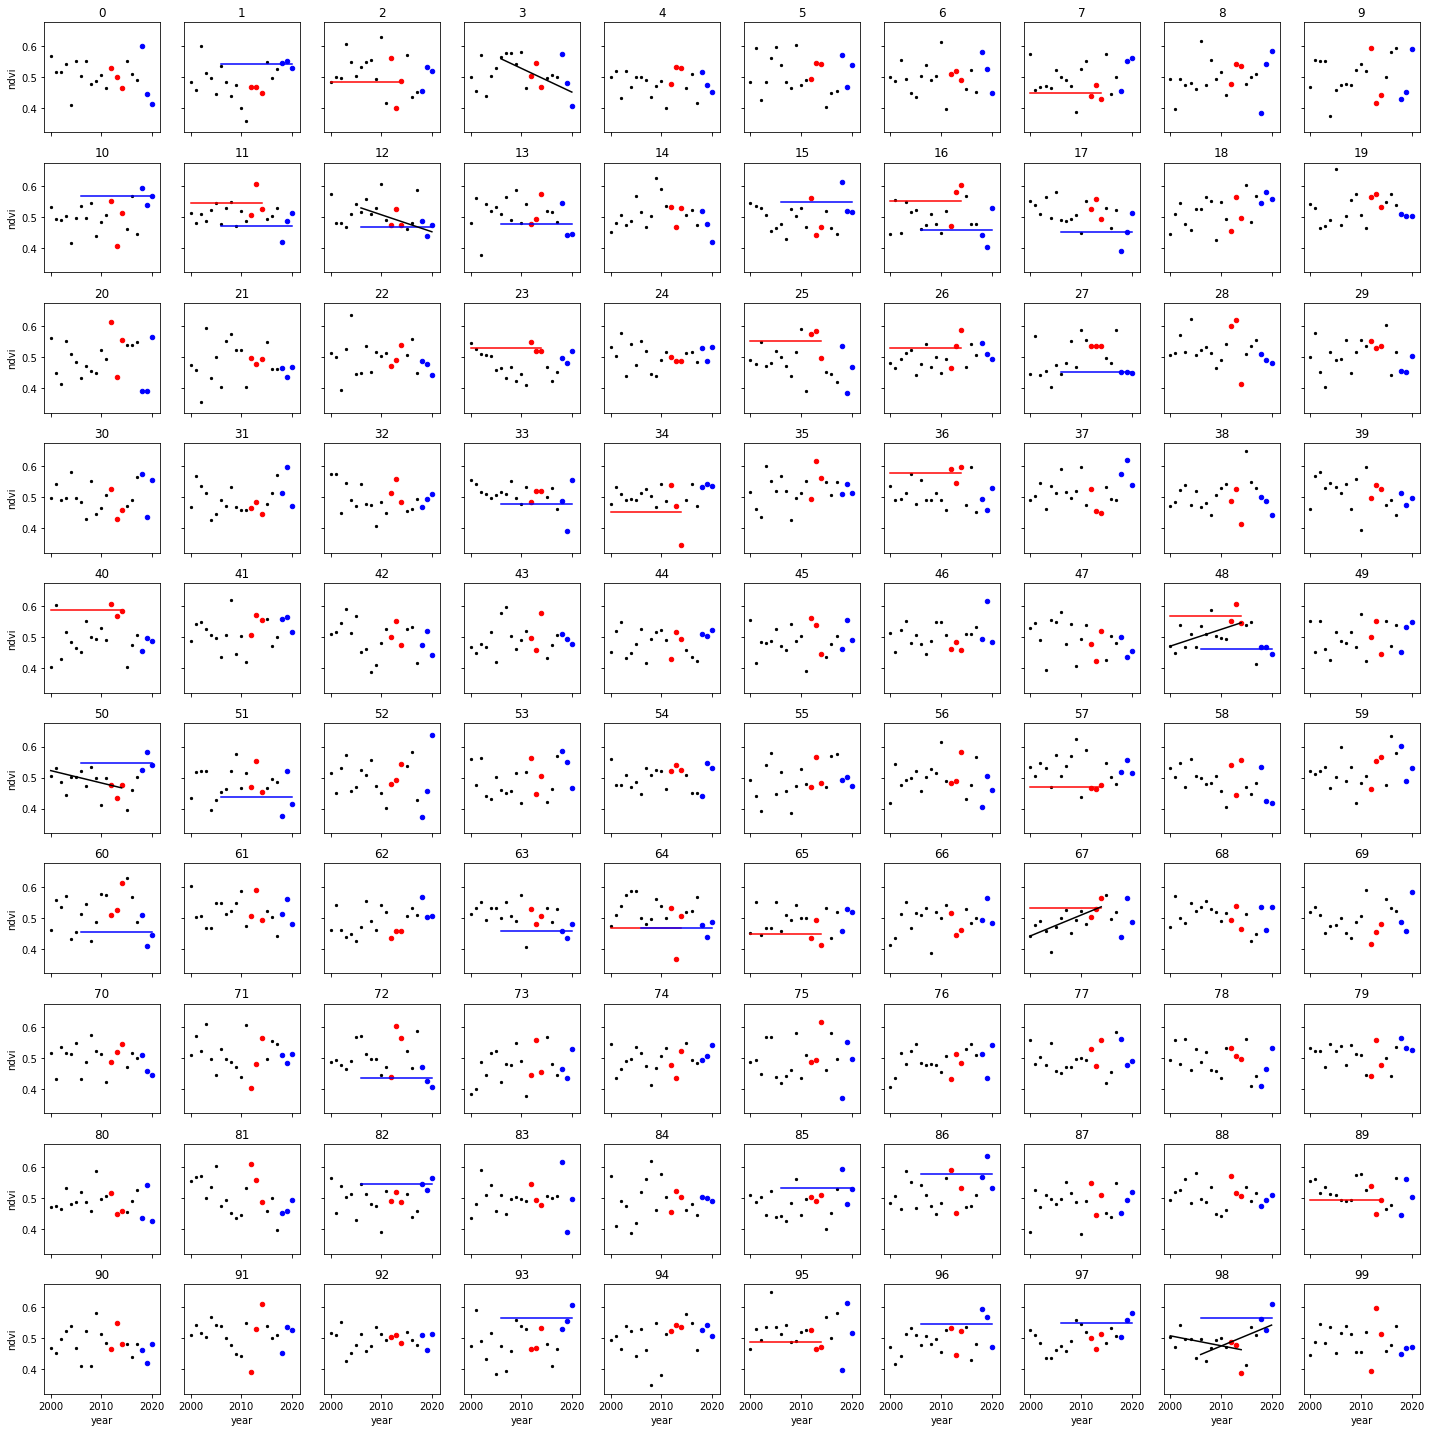

100 simulations run
4  simulations had positive or negative trend in 2000-2014
3  simulations had positive or negative trend in 2006-2020
17  simulations had rank in the top or bottom 10% in 2012-2014
24  simulations had rank in the top or bottom 10% in 2018-2020


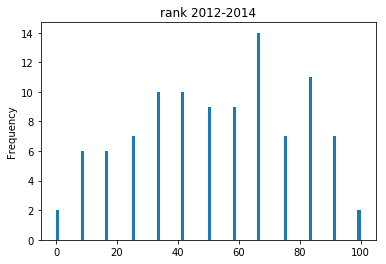

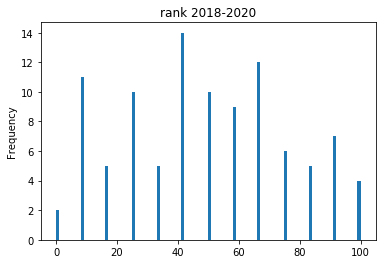

,slope,rand_mu,rand_sigma,mean_12_14,mean_18_20,rank_12_14,rank_18_20,trend_2000_2014,trend_2006_2020
0,0,0.5,0.05,0.4968785234104433,0.4861914988373394,33.333333333333336,25.0,no trend,no trend
1,0,0.5,0.05,0.4602954059451887,0.5412657074276538,41.666666666666664,91.66666666666667,no trend,no trend
2,0,0.5,0.05,0.4824694223738837,0.5022455259738088,8.333333333333334,50.0,no trend,no trend
3,0,0.5,0.05,0.5053291069166362,0.4861977557631347,41.666666666666664,16.666666666666668,no trend,decreasing
4,0,0.5,0.05,0.5128248480964404,0.48063968018636166,83.33333333333333,50.0,no trend,no trend
5,0,0.5,0.05,0.5259885778248844,0.5250583183397787,58.333333333333336,66.66666666666667,no trend,no trend
6,0,0.5,0.05,0.5047176312582313,0.5173580726775681,75.0,66.66666666666667,no trend,no trend
7,0,0.5,0.05,0.44655081171025374,0.5216781995302392,8.333333333333334,75.0,no trend,no trend
8,0,0.5,0.05,0.5179597494151188,0.5035817757178664,83.33333333333333,50.0,no trend,no trend
9,0,0.5,0.05,0.4824459455560843,0.4905345362442473,50.0,41.666666666666664,no trend,no trend


In [5]:
results = pd.DataFrame()

slope = 0
rand_mu = 0.5
rand_sigma=0.05

# set to 0 if no plots wanted (don't plot if more than 100 simulations)
plot = 1
simulations = 100

if plot:
    fig, ax = plt.subplots(10,10,sharex=True, sharey=True, figsize=(20 ,20), tight_layout=True)
ax_x = 0
ax_y = 0

for i in range(simulations):
    df = pd.DataFrame()
    df['year']= np.arange(2000, 2021)
    df.index= pd.date_range(start='2000', end='2021', freq='1Y')
    df['ndvi'] = slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  

    #print('ndvi 2000-2009 sorted', df.loc['2000':'2009', 'ndvi'].sort_values())

    mean_12_14 = df.loc['2012':'2014', 'ndvi'].mean()
    rank_12_14 = stats.percentileofscore(df.loc['2000':'2011', 'ndvi'], mean_12_14)
    mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
    rank_18_20 = stats.percentileofscore(df.loc['2006':'2017', 'ndvi'], mean_18_20)

    trend_2000_2014, h, p, z, Tau, s, var_s, slope_2000_2014, intercept_2000_2014 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
    trend_2006_2020, h, p, z, Tau, s, var_s, slope_2006_2020, intercept_2006_2020 = mk.original_test(df.loc['2006':'2020', 'ndvi'])

    df_result = pd.DataFrame(np.array([[slope,rand_mu,rand_sigma,mean_12_14,mean_18_20,rank_12_14,rank_18_20,trend_2000_2014,trend_2006_2020]]), 
                      columns=['slope','rand_mu','rand_sigma','mean_12_14','mean_18_20','rank_12_14','rank_18_20','trend_2000_2014','trend_2006_2020'],
                      index=[i])
    results=results.append(df_result)
    
    if plot:
        df.loc['2000':'2020'].plot.scatter(x='year', y='ndvi', marker='.', color='k', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
        #df.loc['2013':'2017'].plot.scatter(x='year', y='ndvi', marker='o', color='g', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
        df.loc['2012':'2014'].plot.scatter(x='year', y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
        df.loc['2018':'2020'].plot.scatter(x='year', y='ndvi', marker='o', color='b', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
        #ax[ax_x,ax_y].set_xlim(['1999','2021'])
        #ax[ax_x,ax_y].set_ylim([0,1])
        ax[ax_x,ax_y].set_title(str(i))
        if (rank_12_14 < 10) | (rank_12_14 > 90):
            ax[ax_x,ax_y].plot([2000,2014],[mean_12_14,mean_12_14], color= 'r')
        if (rank_18_20 < 10) | (rank_18_20 > 90):
            ax[ax_x,ax_y].plot([2006,2020],[mean_18_20,mean_18_20], color= 'b')
        #df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
         

        if trend_2000_2014 != 'no trend':
            ax[ax_x,ax_y].plot(df.loc['2000':'2014', 'year'], intercept_2000_2014 + (df.loc['2000':'2014', 'year'] - 2000) * slope_2000_2014, color='k') 
        if trend_2006_2020 != 'no trend':
            ax[ax_x,ax_y].plot(df.loc['2006':'2020', 'year'], intercept_2006_2020 + (df.loc['2006':'2020', 'year'] - 2006) * slope_2006_2020, color='k') 
                
        if ax_y == 9:
            ax_y=0
            ax_x=ax_x+1
        else:
            ax_y=ax_y+1        
    
if plot:
    plt.show()

print(simulations, 'simulations run')
print(results.loc[results['trend_2000_2014'] != 'no trend', 'trend_2000_2014'].count(), ' simulations had positive or negative trend in 2000-2014')
print(results.loc[results['trend_2006_2020'] != 'no trend', 'trend_2006_2020'].count(), ' simulations had positive or negative trend in 2006-2020')
print(results.loc[(results['rank_12_14'].astype(float) < 10) | 
                  (results['rank_12_14'].astype(float) > 90), 'rank_12_14'].count(), ' simulations had rank in the top or bottom 10% in 2012-2014')
print(results.loc[(results['rank_18_20'].astype(float) < 10) | 
                  (results['rank_18_20'].astype(float) > 90), 'rank_18_20'].count(), ' simulations had rank in the top or bottom 10% in 2018-2020')
results['rank_12_14'].astype(float).plot.hist(bins=100, title='rank 2012-2014')
plt.show()
results['rank_18_20'].astype(float).plot.hist(bins=100, title='rank 2018-2020')
plt.show()

results

repeat more times without plots

1000 simulations run
44  simulations had positive or negative trend in 2000-2014
45  simulations had positive or negative trend in 2006-2020
110  simulations had rank in the top or bottom 10% in 2012-2014
121  simulations had rank in the top or bottom 10% in 2018-2020


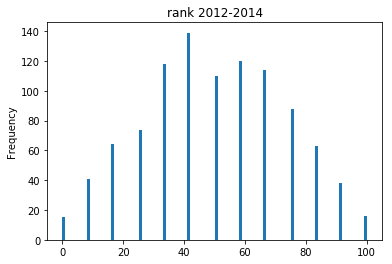

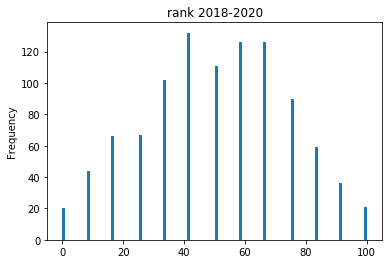

,slope,rand_mu,rand_sigma,mean_12_14,mean_18_20,rank_12_14,rank_18_20,trend_2000_2014,trend_2006_2020
0,0,0.5,0.05,0.5408764031763836,0.4683648884952741,75.0,16.666666666666668,no trend,no trend
1,0,0.5,0.05,0.475164216188709,0.5124853659951426,16.666666666666668,41.666666666666664,no trend,no trend
2,0,0.5,0.05,0.4730397320106958,0.47584660508603793,16.666666666666668,41.666666666666664,no trend,no trend
3,0,0.5,0.05,0.4930362022665254,0.5308994339917673,25.0,58.333333333333336,no trend,no trend
4,0,0.5,0.05,0.49669045195431366,0.45274673464051346,58.333333333333336,8.333333333333334,no trend,no trend
5,0,0.5,0.05,0.48147398000841807,0.5194709853578526,58.333333333333336,66.66666666666667,no trend,no trend
6,0,0.5,0.05,0.5469046555922051,0.5099789078955969,75.0,25.0,no trend,no trend
7,0,0.5,0.05,0.48547184810105076,0.505730709779611,33.333333333333336,58.333333333333336,no trend,no trend
8,0,0.5,0.05,0.524461731985569,0.508443609838552,66.66666666666667,25.0,increasing,no trend
9,0,0.5,0.05,0.5213490883347222,0.4589890374310044,58.333333333333336,33.333333333333336,no trend,no trend


In [8]:
results = pd.DataFrame()

simulations = 1000
for i in range(simulations):
    df = pd.DataFrame()
    df['year']= np.arange(2000, 2021)
    df.index= pd.date_range(start='2000', end='2021', freq='1Y')
    df['ndvi'] = slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  

    #print('ndvi 2000-2009 sorted', df.loc['2000':'2009', 'ndvi'].sort_values())

    mean_12_14 = df.loc['2012':'2014', 'ndvi'].mean()
    rank_12_14 = stats.percentileofscore(df.loc['2000':'2011', 'ndvi'], mean_12_14)
    mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
    rank_18_20 = stats.percentileofscore(df.loc['2006':'2017', 'ndvi'], mean_18_20)

    trend_2000_2014, h, p, z, Tau, s, var_s, slope_2000_2014, intercept_2000_2014 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
    trend_2006_2020, h, p, z, Tau, s, var_s, slope_2006_2020, intercept_2006_2020 = mk.original_test(df.loc['2006':'2020', 'ndvi'])

    df_result = pd.DataFrame(np.array([[slope,rand_mu,rand_sigma,mean_12_14,mean_18_20,rank_12_14,rank_18_20,trend_2000_2014,trend_2006_2020]]), 
                      columns=['slope','rand_mu','rand_sigma','mean_12_14','mean_18_20','rank_12_14','rank_18_20','trend_2000_2014','trend_2006_2020'],
                      index=[i])
    results=results.append(df_result)
    
print(simulations, 'simulations run')
print(results.loc[results['trend_2000_2014'] != 'no trend', 'trend_2000_2014'].count(), ' simulations had positive or negative trend in 2000-2014')
print(results.loc[results['trend_2006_2020'] != 'no trend', 'trend_2006_2020'].count(), ' simulations had positive or negative trend in 2006-2020')
print(results.loc[(results['rank_12_14'].astype(float) < 10) | 
                  (results['rank_12_14'].astype(float) > 90), 'rank_12_14'].count(), ' simulations had rank in the top or bottom 10% in 2012-2014')
print(results.loc[(results['rank_18_20'].astype(float) < 10) | 
                  (results['rank_18_20'].astype(float) > 90), 'rank_18_20'].count(), ' simulations had rank in the top or bottom 10% in 2018-2020')
results['rank_12_14'].astype(float).plot.hist(bins=100, title='rank 2012-2014')
plt.show()
results['rank_18_20'].astype(float).plot.hist(bins=100, title='rank 2018-2020')
plt.show()

results

Mann_Kendall_Test(trend='increasing', h=True, p=0.035498131320662596, z=2.102629932151387, Tau=0.7142857142857143, s=15.0, var_s=44.333333333333336, slope=1.1426877645202804, intercept=0.080936256899383)

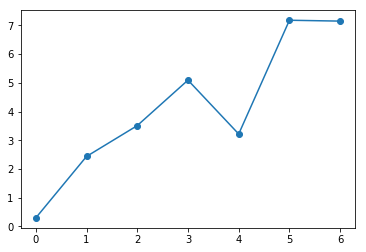

In [62]:
a=[1,2,3,4,5,6,7]+np.random.normal(0, 1, 7)
plt.plot(a, marker='o')
mk.original_test(a)